##librerías





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import altair as alt


##Carga y preprocesamiento  de los datos

In [ ]:
df=pd.read_csv('archivo CSV con precios diarios')

In [ ]:
df.head()

,Date,Symbol,Close
0,2024-04-10,MMM,92.629997
1,2024-04-11,MMM,93.180000
2,2024-04-12,MMM,91.309998
3,2024-04-15,MMM,91.300003
4,2024-04-16,MMM,91.050003


In [ ]:
#No hay datos nulos
df.isnull().sum()

,0
Date,0
Symbol,0
Close,0


In [ ]:
#Se tranformo la columna date a formato datetime
df['Date']=pd.to_datetime(df['Date'])
print(type(df['Date']))
#ordenar los datos por Symbol y Date.
df = df.sort_values(by=['Symbol', 'Date'])

<class 'pandas.core.series.Series'>


In [ ]:
df.head()

,Date,Symbol,Close
682,2024-04-10,A,144.160004
683,2024-04-11,A,145.000000
684,2024-04-12,A,140.729996
685,2024-04-15,A,140.220001
686,2024-04-16,A,136.800003


##Cálculo de Retornos Porcentuales Diarios

In [ ]:
#Se calculan los retornos porcentuales diarios y se elimina el primer dato de cada accion ,con el fin no tener datos vacios
df['Retornos porcentuales diarios'] = df.groupby('Symbol')['Close'].pct_change() * 100

df=df.dropna()


##Cálculo de Indicadores de Volatilidad

In [ ]:
#se crea un DataFrame con métricas de volatilidad para cada empresa, calculadas a partir de los retornos porcentuales diarios: desviación estándar, rango, y media absoluta.

volatilidad = df.groupby('Symbol').agg(
    Desviacion_estandar =('Retornos porcentuales diarios', 'std'),
    Rango=('Retornos porcentuales diarios', lambda x: x.max() - x.min()),
    Media_absoluta=('Retornos porcentuales diarios', lambda x: x.abs().mean())
)

volatilidad.head(10)

,Desviacion_estandar,Rango,Media_absoluta
Symbol,,,
A,1.864327,13.614967,1.272565
AAL,2.584809,20.141823,1.622624
AAP,2.792724,18.142082,2.032992
AAPL,1.767060,9.451262,1.292665
ABBV,1.343008,7.738846,1.060007
ABT,1.048657,6.205312,0.764130
ACGL,1.222032,5.241637,0.965887
ACN,1.454011,10.346207,0.954046
ADBE,2.375018,21.155127,1.320002


##Escalamiento de los Datos

In [ ]:

# Escalamiento de los datos de volatilidad
scaler = StandardScaler()
df_t = scaler.fit_transform(volatilidad)



##Clusterización

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

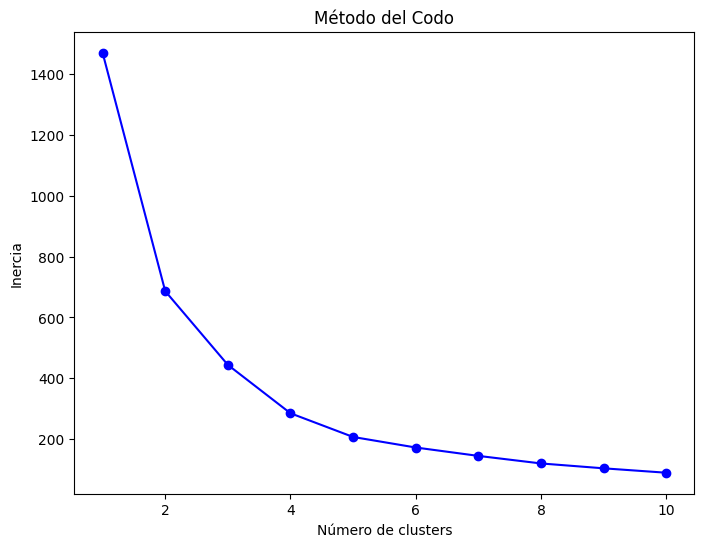

In [ ]:
#prueba metodo del codo

inercia = []

K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_t)
    inercia.append(kmeans.inertia_)

# Grafica  método del codo
plt.figure(figsize=(8, 6))
plt.plot(K, inercia, 'bo-')  # Corregido para usar la lista inercia
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

#La prueba arroja que el numero de k optimo es 3

In [ ]:
# Aplicación de KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
cluster = kmeans.fit_predict(df_t)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
#Agregar los grupos de cluster en una nueva columna al dataframe escalado
volatilidad['cluster'] = cluster
volatilidad.head(50)

,Desviacion_estandar,Rango,Media_absoluta,cluster
Symbol,,,,
A,1.864327,13.614967,1.272565,1
AAL,2.584809,20.141823,1.622624,1
AAP,2.792724,18.142082,2.032992,1
AAPL,1.767060,9.451262,1.292665,1
ABBV,1.343008,7.738846,1.060007,0
ABT,1.048657,6.205312,0.764130,0
ACGL,1.222032,5.241637,0.965887,0
ACN,1.454011,10.346207,0.954046,0
ADBE,2.375018,21.155127,1.320002,1


##Reducción de Dimensionalidad para Visualización

In [ ]:
# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)

df_pca = pca.fit_transform(df_t)

df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = cluster




##Visualización de los Resultados

In [ ]:
#Visualizacion en 2D grupos del cluster
chart = alt.Chart(df_pca).mark_circle(size=60).encode(
    x='PCA1',
    y='PCA2',
    color='Cluster:N'
).interactive().properties(
    title="Grupos del cluster"
)

chart

alt.Chart(...)

In [ ]:
#Visualizacion en 2D relación entre   Desviación Estándar y Rango por Cluster
P = alt.Chart(volatilidad).mark_circle(size=60).encode(
    x='Desviacion_estandar:Q',
    y='Rango:Q',
    color='cluster:N'
).interactive().properties(
    title="Relación entre Desviación Estándar y Rango por Cluster"
)

P

alt.Chart(...)

In [ ]:
#Visualizacion en 2D relación entre Media Absoluta y Desviación Estándar por Cluster

m= alt.Chart(volatilidad).mark_circle(size=60).encode(
    y='Media_absoluta:Q',
    x='Desviacion_estandar:Q',
    color='cluster:N'
).interactive().properties(
    title="Relación entre Media Absoluta y Desviación Estándar por Cluster"
)

m

alt.Chart(...)

In [ ]:
#Visualizacion en 2D relación entre Media Absoluta y Rango por Cluster
r = alt.Chart(volatilidad).mark_circle(size=60).encode(
    y='Media_absoluta:Q',
    x='Rango:Q',
    color='cluster:N'
).interactive().properties(
    title="Relación entre Media Absoluta y Rango por Cluster"
)

r

alt.Chart(...)

##Análisis e Interpretación




Al ver los resultados de la clusterización de la volatilidad de las empresas del índice S&P 500, el cual generó 3 grupos, y comparando las variables relacionadas a la volatilidad, se puede deducir que los grupos están divididos en: Empresas con volatilidad baja, Empresas con volatilidad media y Empresas con volatilidad alta.

Las empresas con volatilidad baja presentan una desviación estándar aproximadamente entre 0 y 3, una media absoluta aproximadamente entre 0 y 1.5, y un rango entre 0 y 25. Por lo tanto, este grupo presenta relativamente un bajo riesgo, pero también poca rentabilidad.

Las empresas con volatilidad media presentan una desviación estándar aproximadamente entre 1 y 4, una media absoluta aproximadamente entre 1 y 3, y un rango entre 7 y 40. Estas empresas muestran un equilibrio moderado entre riesgo y rentabilidad, lo cual indica que, aunque hay un nivel medio de volatilidad, también existe un potencial de ganancias razonable.

Por último, las empresas con volatilidad alta tienen una desviación estándar aproximadamente entre 2 y 8, una media absoluta aproximadamente entre 1.5 y 3.5, y un rango entre 20 y 80. Este grupo se caracteriza por un mayor nivel de riesgo debido a la alta volatilidad, pero también sugiere la posibilidad de mayores rendimientos para los inversores dispuestos a asumir ese riesgo.
